# Libraries

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Data

In [173]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Plot

In [174]:
scatter = px.scatter(data, x='EstimatedSalary', y='Purchased')
scatter.show()

# Processing Data

Splitting The Independent and Dependent Variable

In [175]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

Splitting The Training and Test Set

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature Scaling

In [177]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training The Model

In [178]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

Predicting The result

In [179]:
y_pred = knn.predict(X_test)

Confusion Matrix

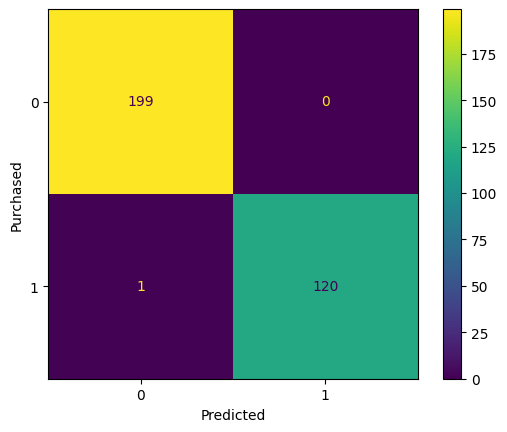

In [180]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn, X_train, y_train)
plt.ylabel('Purchased')
plt.xlabel('Predicted')
plt.show()

In [181]:
from sklearn.metrics import r2_score
print("Accuracy of the tuned model: %.4f" %knn.score(X_train, y_train))

Accuracy of the tuned model: 0.9969


# Parameter Tuning

In [182]:
from subprocess import check_output
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [183]:
n_range = list(range(1, 10))
weight_list = ['uniform', 'distance']
param_grid = {
    'n_neighbors' : n_range,
    'weights': weight_list
}

grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=3,
    scoring = 'accuracy',
    refit = True
)

In [184]:
knn_model = make_pipeline(preprocessing.StandardScaler(), grid)
knn_model.fit(X_train, y_train)
print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)

Accuracy of the tuned model: 0.9064
{'n_neighbors': 5, 'weights': 'uniform'}


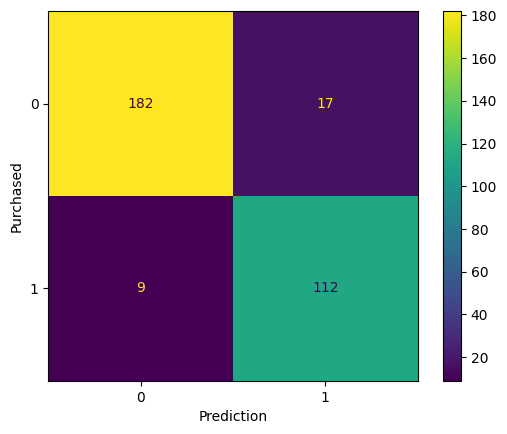

In [185]:
ConfusionMatrixDisplay.from_estimator(knn_model, X_train, y_train)
plt.xlabel('Prediction')
plt.ylabel('Purchased')
plt.show()

# Plot

In [186]:
from matplotlib.colors import ListedColormap
X_set, y_set = scaler.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2,  knn.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

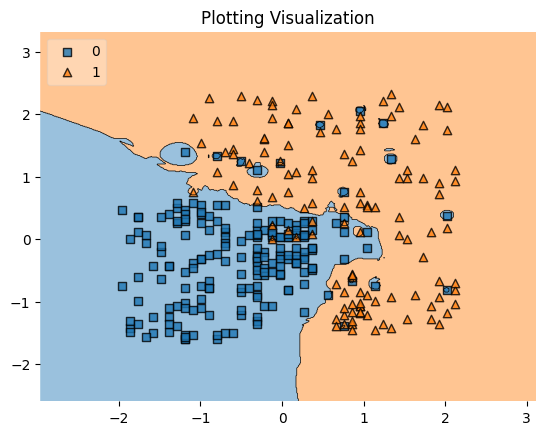

In [187]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, np.array(y_train), clf=knn, legend=2)
plt.title('Plotting Visualization')
plt.show()